In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
cols =df.columns

In [8]:
cols

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

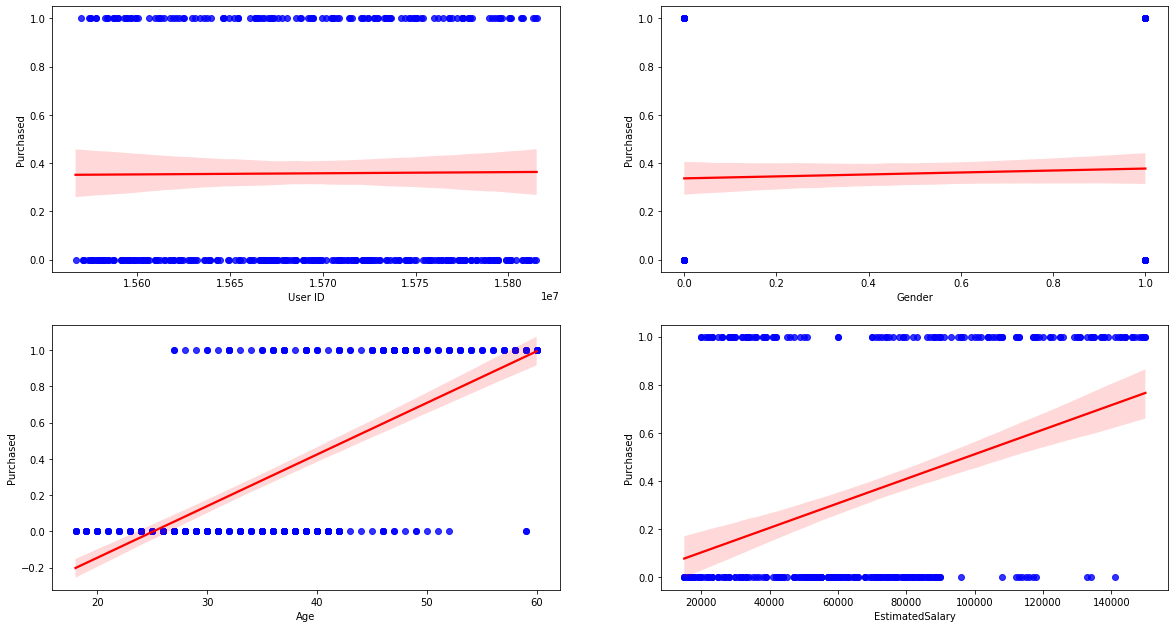

In [11]:
x_f=cols.copy()[:-1]
index=1
plt.figure(figsize=(20,40))
for col in x_f:
    plt.subplot(7,2,index)
    index=index+1
    sns.regplot(x=df[col],y=df['Purchased'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [12]:
X = df.iloc[:, 2:4]
y = df.iloc[:, -1]
 


    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print( "SCORE :",model.score(X_test,y_test))

SCORE : 0.675


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print(model_lr.intercept_)
print(model_lr.coef_)

[-0.97166982]
[[2.15939494 1.15465619]]


In [14]:
model_lr.score(X_test,y_test)

0.875

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=model_lr.predict(X_test)

cf=confusion_matrix(y_test,y_predict)

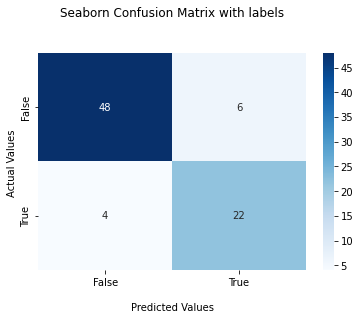

In [19]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
print(classification_report(y_test,y_predict,target_names=['not purchased','purchased']))

               precision    recall  f1-score   support

not purchased       0.92      0.89      0.91        54
    purchased       0.79      0.85      0.81        26

     accuracy                           0.88        80
    macro avg       0.85      0.87      0.86        80
 weighted avg       0.88      0.88      0.88        80

